Linear Regression

In [1]:
# I used an insurance dataset to predict the premiums that an insurance provider would charge its customers.

In [2]:
# While it may seem intuitive that individuals with a higher risk of illness are charged higher insurance premiums, the actual calculation of premiums is far more complex and personalized.

In [3]:
# To begin the prediction task, I applied a linear regression algorithm, which is well-suited for cases where independent and dependent variables have a linear relationship.

In [4]:
# It also serves as a baseline model for performance comparison with other regression algorithms.

In [5]:
# Created by JANG HYUNWOO using GPT in a Jupyter Notebook.

In [1]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,charges
0,0,19,0,27.900,0,1,16884.92400
1,1,18,1,33.770,1,0,1725.55230
2,2,28,1,33.000,3,0,4449.46200
3,3,33,1,22.705,0,0,21984.47061
4,4,32,1,28.880,0,0,3866.85520


In [8]:
# Age (continuous)
# Sex (categorical): 0 - Male, 1 - Female
# Body Mass Index (BMI) (continuous)
# Smoker (categorical): 1 - Smoker, 0 - Non-smoker
# Charges (target, continuous) – Insurance claim amount

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   int64  
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   int64  
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [3]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1338.0,668.50,386.39,0.00,334.25,668.50,1002.75,1337.00
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
sex,1338.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
smoker,1338.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [4]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [6]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
# The model was trained using the training dataset.

LinearRegression()

In [7]:
pred = LR.predict(x_test)
# The model was used to make predictions on the test features.

In [8]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<Axes: xlabel='actual', ylabel='pred'>

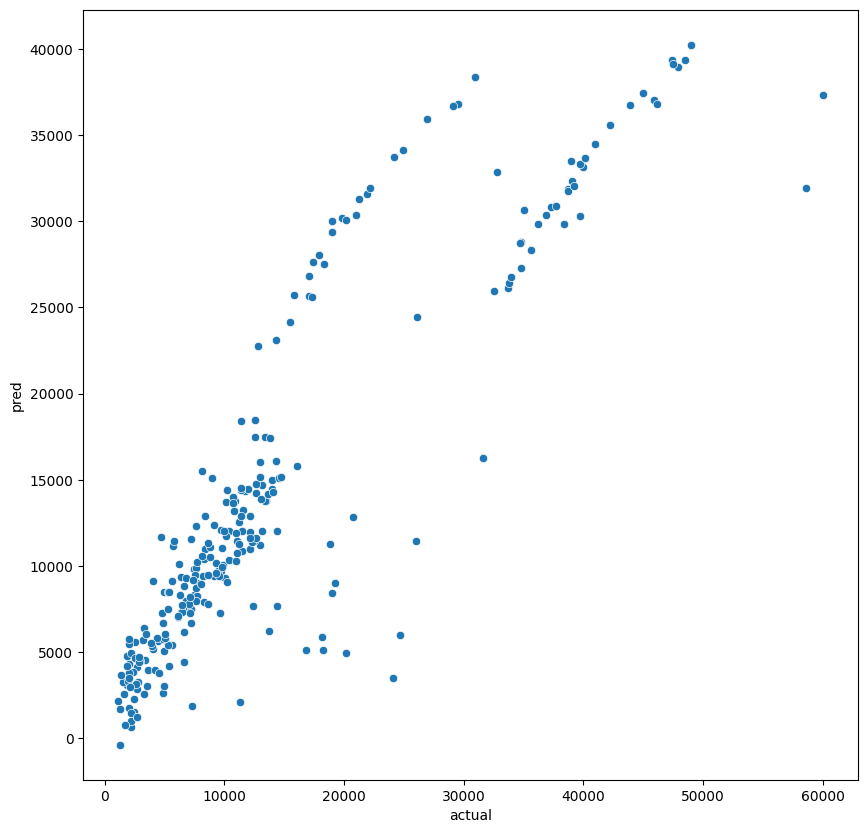

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

<function mean_squared_error at 0x7f135df21800>
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py


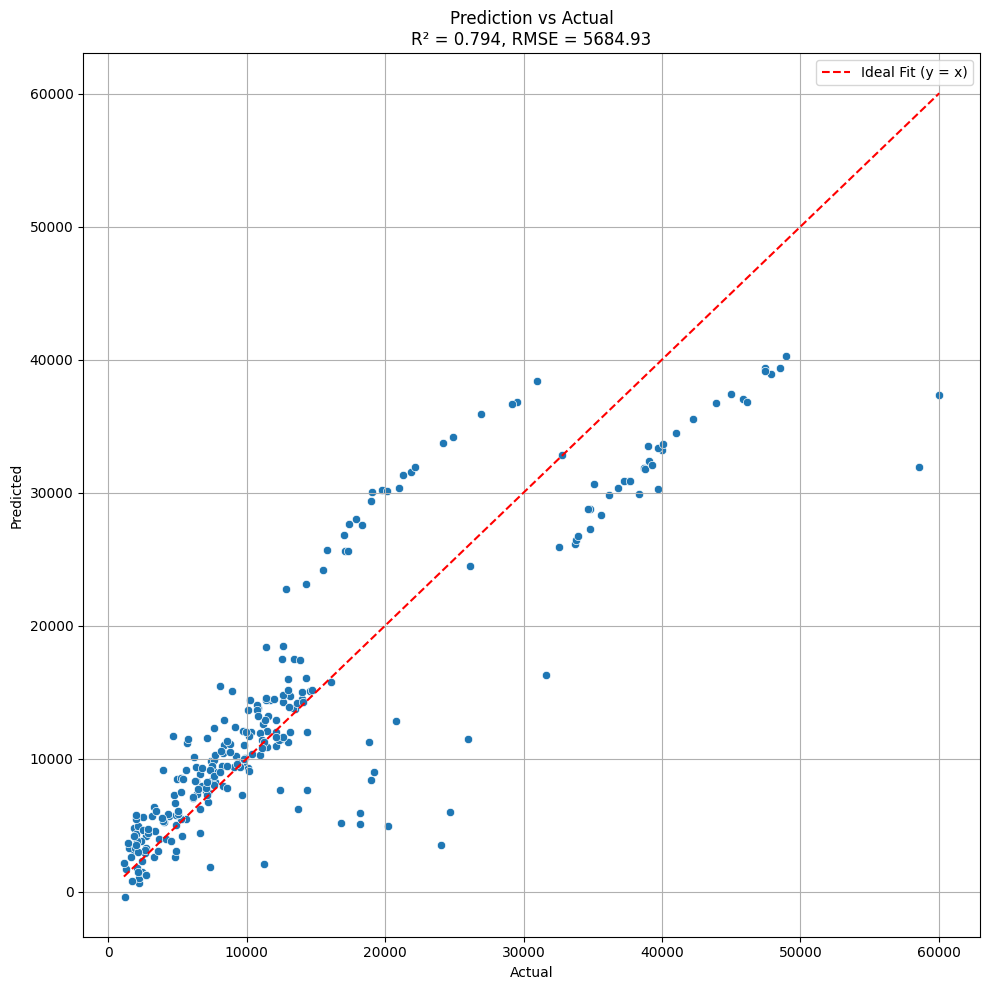

In [11]:
# Plot_ver upgrade
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
print(mean_squared_error)
import inspect
print(inspect.getfile(mean_squared_error))

comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

# Calculate R² and RMSE
r2 = r2_score(comparison['actual'], comparison['pred'])
mse = mean_squared_error(comparison['actual'], comparison['pred'])
rmse = np.sqrt(mse)
# Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='actual', y='pred', data=comparison)
plt.plot([comparison['actual'].min(), comparison['actual'].max()],
         [comparison['actual'].min(), comparison['actual'].max()],
         color='red', linestyle='--', label='Ideal Fit (y = x)')

plt.title(f'Prediction vs Actual\nR² = {r2:.3f}, RMSE = {rmse:.2f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# R², or the coefficient of determination, is a statistical measure that indicates how well a regression model explains the variance in the dependent variable. An R² value close to 1 means that
# the model explains most of the variability in the data, while a value closer to 0 indicates that the model does not capture much of the variability.
# R-squared = SSE/SST , SSE : Sum of squared errors between predicted and actual values , SST : Sum of squared deviations from the mean of the actual values
# An R² value of 0.79 means that approximately 79% of the variation in the target variable (e.g., insurance charges) can be explained by the model's input features.

In [ ]:
# RMSE measures the average magnitude of the errors between predicted and actual values, expressed in the same unit as the target variable. A lower RMSE indicates a better fit,
# meaning the model's predictions are closer to the actual outcomes.

In [13]:
LR.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [15]:
pd.Series(LR.coef_, index = X.columns)

,0
age,264.799803
sex,17.344661
bmi,297.514806
children,469.339602
smoker,23469.280173


In [16]:
# 1. Model using all x col.
X_full = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']
model_full = LinearRegression().fit(X_full, y)
r2_full = r2_score(y, model_full.predict(X_full))

# 2. Model using only 'smoker'
X_smoker = df[['smoker']]
model_smoker = LinearRegression().fit(X_smoker, y)
r2_smoker = r2_score(y, model_smoker.predict(X_smoker))

print("R² (full model):", r2_full)
print("R² (smoker only):", r2_smoker)


R² (full model): 0.7497225098709179
R² (smoker only): 0.6197648148218988
